In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
main_df = pd.read_csv("Image_classification_data/data_labels_mainData.csv", delimiter=",")
main_df

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [9]:
main_df.cellTypeName.value_counts()

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [10]:
main_df.isCancerous.value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

In [11]:
extra_df = pd.read_csv("Image_classification_data/data_labels_extraData.csv")
extra_df

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [12]:
extra_df.isCancerous.value_counts()

0    7394
1    2990
Name: isCancerous, dtype: int64

kinda imbalanced dataset

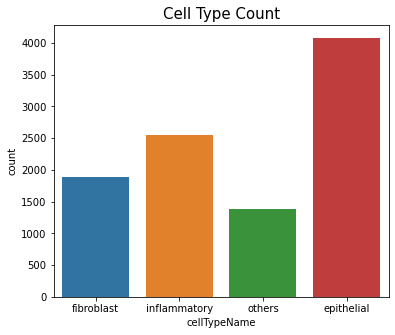

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x=main_df.cellTypeName)
plt.title("Cell Type Count",fontsize=15)
plt.show()

In [14]:
main_df.isnull().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

<AxesSubplot:xlabel='cellTypeName', ylabel='count'>

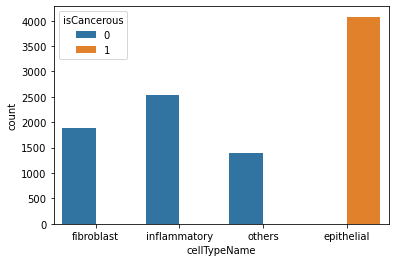

In [15]:
sns.countplot(x=main_df.cellTypeName, hue=main_df.isCancerous)

**Comments**: It's cancerous if its cell type is *epithelial*

# Split dataset into different folders for different classes

In [21]:
import shutil
root = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/"
source_dir = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/patch_images"
for i, row in main_df.iterrows():
    image_name = row["ImageName"]
    cell_name = row["cellTypeName"]
    is_cancer = str(row["isCancerous"])

    new_folder_multi = os.path.join(root, cell_name)
    new_folder_bin = os.path.join(root, is_cancer)

    # os.makedirs(new_folder_multi, exist_ok=True)
    os.makedirs(new_folder_bin, exist_ok=True)

    source = os.path.join(source_dir, image_name)

    # dest_multi = os.path.join(root, cell_name)
    dest_bin = os.path.join(root, is_cancer)

    # go = shutil.copy(source,dest_multi)
    go = shutil.copy(source, dest_bin)





In [22]:
import shutil
root = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/"
source_dir = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/patch_images"

for i, row in extra_df.iterrows():
    image_name = row["ImageName"]
    is_cancer = str(row["isCancerous"])

    new_folder_bin = os.path.join(root, is_cancer)

    os.makedirs(new_folder_bin, exist_ok=True)

    source = os.path.join(source_dir, image_name)

    dest_bin = os.path.join(root, is_cancer)

    go = shutil.copy(source, dest_bin)


In [28]:
path = r"/Users/lap11353-local/Desktop/ML/A2/Image_classification_data/multi-task"
dest = os.path.join(path, "others")
source = os.path.join(root, "others")

_ = shutil.move(source, dest)

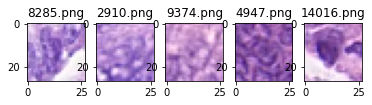

In [1]:
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
%matplotlib inline
# plt.figure(figsize=(20,20))
img_folder=r'Image_classification_data/binary-task/1'

def display_images(amount, img_folder):
    for i in range(amount):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,amount,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

display_images(5, img_folder)

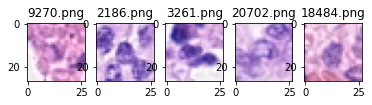

In [2]:
img_folder=r'Image_classification_data/binary-task/0'
display_images(5, img_folder)